In [1]:
!pip install pyspark pandas matplotlib seaborn

In [8]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import avg

In [3]:
# Создание SparkSession
spark = SparkSession.builder \
    .master("spark://spark-master:7077") \
    .appName("WordCount") \
    .getOrCreate()

In [10]:
# Чтение CSV файла
df = spark.read.csv("hdfs://namenode:8020/cars.csv", header=True, inferSchema=True)

In [5]:
df.show()

+-----------------+----------+------------+------+--------------+-------------+-----------+--------------+-----------+---------------+---------+------------+-----+----------+---------+---------------+---------------+----------------+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------------+
|              _c0|       _c1|         _c2|   _c3|           _c4|          _c5|        _c6|           _c7|        _c8|            _c9|     _c10|        _c11| _c12|      _c13|     _c14|           _c15|           _c16|            _c17|      _c18|     _c19|     _c20|     _c21|     _c22|     _c23|     _c24|     _c25|     _c26|     _c27|     _c28|           _c29|
+-----------------+----------+------------+------+--------------+-------------+-----------+--------------+-----------+---------------+---------+------------+-----+----------+---------+---------------+---------------+----------------+----------+---------+---------+---------+----

In [11]:
# Рассчитываем среднюю цену автомобилей по годам выпуска
average_price_by_year = df.groupBy("year_produced").agg(avg("price_usd").alias("average_price"))

In [12]:
# Округляем значения средней цены и сортируем по году
average_price_by_year = average_price_by_year.withColumn("average_price", average_price_by_year["average_price"].cast("int")) \
                                             .orderBy("year_produced")

In [13]:
# Выводим результат
average_price_by_year.show()

+-------------+-------------+
|year_produced|average_price|
+-------------+-------------+
|         1942|        22011|
|         1950|         2000|
|         1956|         1000|
|         1959|          800|
|         1960|         4517|
|         1961|         6500|
|         1962|         4258|
|         1963|         2331|
|         1964|         3687|
|         1965|         9773|
|         1966|         2225|
|         1967|         9300|
|         1968|         3271|
|         1969|         2064|
|         1970|         4522|
|         1971|          650|
|         1972|         1570|
|         1973|         1404|
|         1974|         2787|
|         1975|         1890|
+-------------+-------------+
only showing top 20 rows



In [14]:
# Преобразуем результат в Pandas DataFrame
average_price_by_year_pd = average_price_by_year.orderBy("year_produced").toPandas()


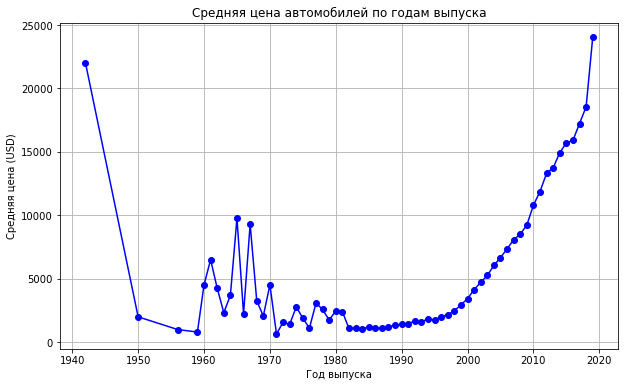

In [15]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year_pd["year_produced"], average_price_by_year_pd["average_price"], marker='o', color='b')
plt.title("Средняя цена автомобилей по годам выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Средняя цена (USD)")
plt.grid(True)
plt.show()

In [ ]:
# Посчитаем среднюю цену автомобилей конкретной марки

In [16]:
# Фильтруем данные для марки Porsche
porsche_df = df.filter(df["manufacturer_name"] == "Porsche")

# Рассчитываем среднюю цену автомобилей Porsche по годам выпуска
average_price_by_year_porsche = porsche_df.groupBy("year_produced").agg(avg("price_usd").alias("average_price"))

# Округляем значения средней цены и сортируем по году
average_price_by_year_porsche = average_price_by_year_porsche.withColumn("average_price", average_price_by_year_porsche["average_price"].cast("int")) \
 

In [17]:
# Выводим результат
average_price_by_year_porsche.show()

+-------------+-------------+
|year_produced|average_price|
+-------------+-------------+
|         2003|         8578|
|         2007|        13666|
|         2015|        35900|
|         2006|        10519|
|         2013|        31000|
|         2014|        38500|
|         2004|         9404|
|         2012|        28150|
|         2009|        18475|
|         2016|        47900|
|         2005|         9860|
|         2010|        25192|
|         2011|        30329|
|         2008|        14441|
|         1999|         9000|
+-------------+-------------+



In [22]:
# Конвертируем результат в Pandas DataFrame
average_price_by_year_porsche_pd = average_price_by_year_porsche.orderBy("year_produced").toPandas()

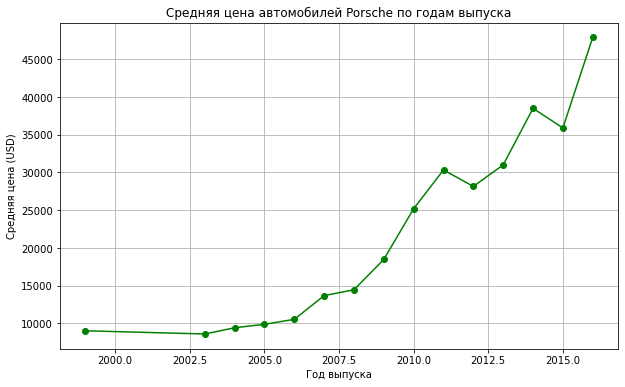

In [23]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year_porsche_pd["year_produced"], average_price_by_year_porsche_pd["average_price"], marker='o', color='g')
plt.title("Средняя цена автомобилей Porsche по годам выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Средняя цена (USD)")
plt.grid(True)
plt.show()

In [ ]:
# диаграмма рассеяния зависимости цены автомобиля от пробега

In [24]:
# Выбираем нужные столбцы и преобразуем данные в формат Pandas
price_odometer_df = df.select("price_usd", "odometer_value").toPandas()

In [25]:
# Фильтруем данные для удаления записей с нулевыми или отсутствующими значениями
price_odometer_df = price_odometer_df.dropna()
price_odometer_df = price_odometer_df[price_odometer_df["price_usd"] > 0]
price_odometer_df = price_odometer_df[price_odometer_df["odometer_value"] > 0]

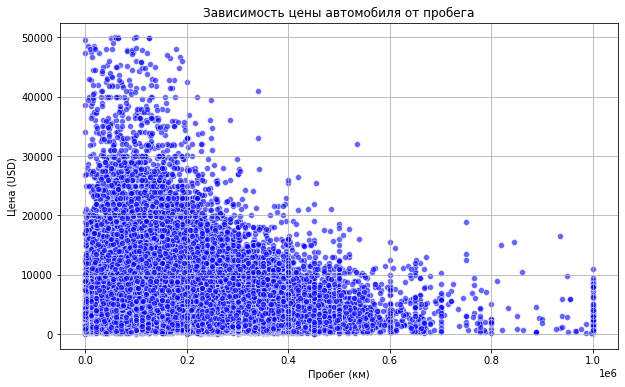

In [26]:
# Построение диаграммы рассеяния с Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x="odometer_value", y="price_usd", data=price_odometer_df, alpha=0.6, color="b")
plt.title("Зависимость цены автомобиля от пробега")
plt.xlabel("Пробег (км)")
plt.ylabel("Цена (USD)")
plt.grid(True)
plt.show()

In [ ]:
# диаграмма рассеяния для автомобилей марки Lexus

In [27]:
# Фильтруем данные для автомобилей марки Lexus
lexus_df = df.filter(df["manufacturer_name"] == "Lexus")

# Выбираем нужные столбцы и преобразуем в формат Pandas
price_odometer_lexus_df = lexus_df.select("price_usd", "odometer_value").toPandas()

In [28]:
# Фильтруем данные для удаления записей с нулевыми или отсутствующими значениями
price_odometer_lexus_df = price_odometer_lexus_df.dropna()
price_odometer_lexus_df = price_odometer_lexus_df[price_odometer_lexus_df["price_usd"] > 0]
price_odometer_lexus_df = price_odometer_lexus_df[price_odometer_lexus_df["odometer_value"] > 0]

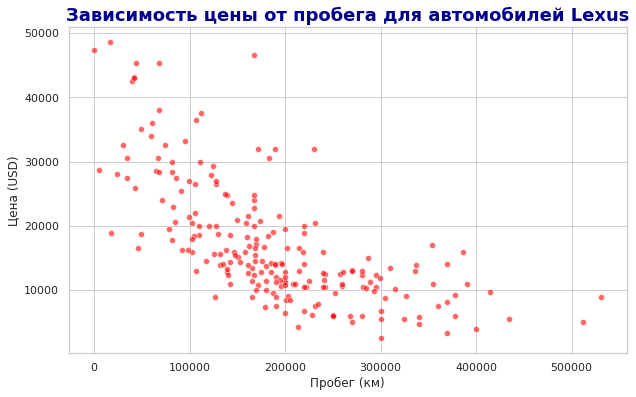

In [44]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x="odometer_value", y="price_usd", data=price_odometer_lexus_df, alpha=0.6, color="red")
plt.title("Зависимость цены от пробега для автомобилей Lexus", fontsize=18, weight="bold", color="darkblue")
plt.xlabel("Пробег (км)")
plt.ylabel("Цена (USD)")
plt.grid(True)
plt.show()